In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Flatten , Dense ,BatchNormalization , Dropout



In [44]:

classifier = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)), 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


Found 28000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Epoch 1/40
437/437 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.9820 - loss: 0.0547 - val_accuracy: 0.9874 - val_loss: 0.0363
Epoch 2/40
437/437 ━━━━━━━━━━━━━━━━━━━━ 34s 77ms/step - accuracy: 0.9872 - loss: 0.0436 - val_accuracy: 0.9712 - val_loss: 0.0884
Epoch 3/40
437/437 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9688 - loss: 0.0709 - val_accuracy: 0.9616 - val_loss: 0.1067
Epoch 4/40
437/437 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.9852 - loss: 0.0437 - val_accuracy: 0.9624 - val_loss: 0.0766
Epoch 5/40
437/437 ━━━━━━━━━━━━━━━━━━━━ 34s 77ms/step - accuracy: 0.9883 - loss: 0.0387 - val_accuracy: 0.9940 - val_loss: 0.0187
Epoch 6/40
437/437 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 1.0000 - loss: 8.9143e-05 - val_accuracy: 0.9940 - val_loss: 0.0191
Epoch 7/40
437/437 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.9874 - loss: 0.0352 - val_accuracy: 0.9954 - val_loss: 0.0137
Epo

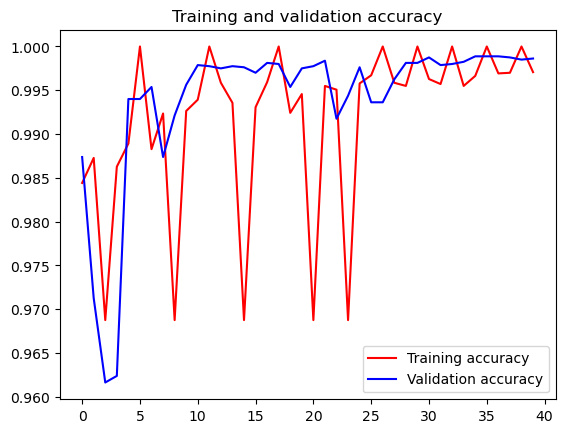

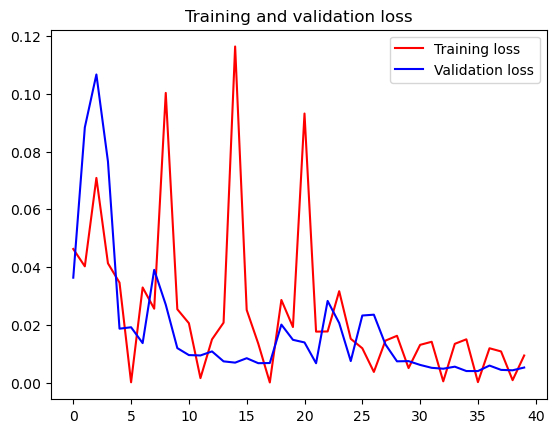

In [47]:
import tensorflow as tf

# Image augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,                # Rescale pixel values from [0, 255] to [0, 1]
    shear_range=0.2,               # Apply random shear transformations
    zoom_range=0.2,                # Apply random zoom transformations
    horizontal_flip=True           # Randomly flip images horizontally
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Only rescale test/validation data

# Load images
training_set = train_datagen.flow_from_directory(
    'dataset/train',        # Directory with training images
    target_size=(64, 64),          # Resize all images to 64x64
    batch_size=32,                 # Number of images to be yielded from the generator per batch
    class_mode='binary'            # Type of label arrays to be returned ('binary' for binary classification)
)

test_set = test_datagen.flow_from_directory(
    'dataset/test',            # Directory with test/validation images
    target_size=(64, 64),          # Resize all images to 64x64
    batch_size=32,                 # Number of images to be yielded from the generator per batch
    class_mode='binary'            # Type of label arrays to be returned ('binary' for binary classification)
)


history = classifier.fit(
    training_set,
    steps_per_epoch=int(14000/32),       # Convert to integer
    epochs=40,
    validation_data=test_set,
    # validation_steps=int(4000/32),     
)

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
